In [1]:
import numpy as np
import matplotlib.pyplot as plt
### import the following modules:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection as md
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import itertools
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

## Functions

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
def MLPClass(X_tr, X_va, Y_tr):

    clf = MLPClassifier(solver='adam', alpha=1e-5,
                        hidden_layer_sizes=(20,20), max_iter=200,
                       early_stopping=True, validation_fraction=0.1 )

    ## fitting the model:
    clf.fit(X_tr, Y_tr)

    ## predict the response for tr and va sets. We can have two outputs: probability (e.g.,PY_tr_prob ) and  the winner class (e.g.,PY_tr):
    PY_tr_prob = clf.predict_proba(X_tr)
    PY_tr = clf.predict(X_tr)

    PY_va_prob = clf.predict_proba(X_va)
    PY_va = clf.predict(X_va)

    print ('Training Done')
    
    return PY_tr_prob, PY_tr, PY_va_prob, PY_va


## Classification - Forest Cover

In [17]:
df = pd.read_csv('covtype.csv')

In [18]:
#df_spruce = df[df.Cover_Type == 1]
#df_lodgepole = df[df.Cover_Type == 2]

#df = df_spruce.append(df_lodgepole)

# "class" column as numpy array.
y = df["Cover_Type"].values
print(type(y))

# All data except "class" column.
x = df.drop(["Cover_Type"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x,tar,test_size=0.25)

# Print the shape of the split data
print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

# Normalize the data, as was done in Q2
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

<class 'numpy.ndarray'>
(581012, 54)
training set ==  (435759, 54) (435759, 7) ,, validation set ==  (145253, 54) (145253, 7)


In [19]:
PY_tr_prob, PY_tr, PY_va_prob, PY_va = MLPClass(X_tr, X_va, Y_tr)

Training Done


Normalized confusion matrix
[[6.02280412e-01 3.07057646e-01 1.15914194e-02 5.54548651e-04
  5.28850055e-03 1.08610382e-02 6.23664349e-02]
 [1.38398961e-01 7.97597074e-01 1.09550178e-02 1.70905113e-05
  3.18396226e-02 2.11751436e-02 1.70905113e-05]
 [2.27870289e-03 1.07712533e-01 6.46976337e-01 4.68010517e-02
  8.41367222e-03 1.86064855e-01 1.75284838e-03]
 [0.00000000e+00 0.00000000e+00 1.06666667e-01 8.66666667e-01
  0.00000000e+00 2.66666667e-02 0.00000000e+00]
 [5.71428571e-02 1.71428571e-01 0.00000000e+00 0.00000000e+00
  7.71428571e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.49908592e-01 2.85191956e-01 5.85009141e-02
  0.00000000e+00 5.06398537e-01 0.00000000e+00]
 [2.74324324e-01 5.40540541e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.71621622e-01]]


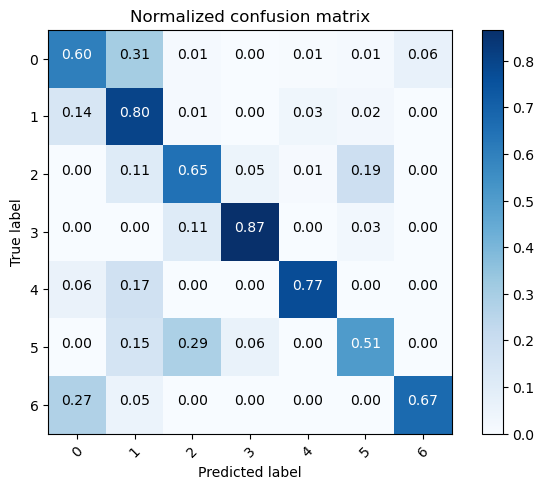

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(PY_va.argmax(axis=1), Y_va.argmax(axis=1))

#confusion_matrix(
#    y_test.values.argmax(axis=1), predictions.argmax(axis=1))

#Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['0','1', '2', '3', '4', '5', '6'],
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2', '3', '4', '5', '6'], normalize=True,
                      title='Normalized confusion matrix')

Index(['2596', '51', '3', '258', '0', '510', '221', '232', '148', '6279', '1',
       '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10',
       '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '1.1', '0.32', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '5'],
      dtype='object')

<_io.TextIOWrapper name='covtype.data' mode='r' encoding='cp1252'>